In [1]:
import pandas as pd

data = pd.read_csv('data.csv')
data.dropna(inplace=True) # remove NaN values
data.drop(columns=['value'], inplace=True) # remove unnecessary `value` column
data.head()

,Location Latitude,Location Longitude
0,53.229648,-1.193654
1,53.000467,-1.144629
2,53.151023,-0.994262
3,52.970298,-1.155705
4,53.002265,-0.401439


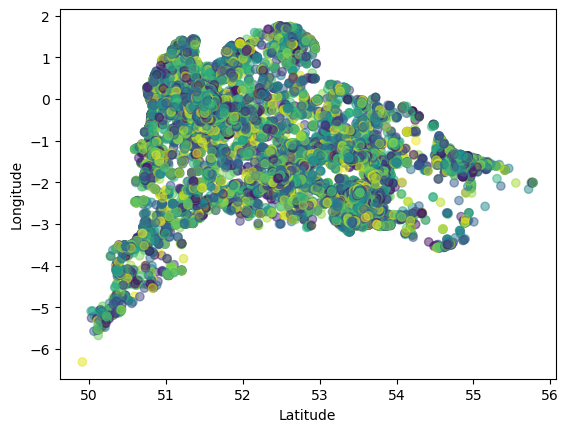

In [2]:
import numpy as np
import matplotlib.pyplot as plt

colors = np.random.rand(data.shape[0])
plt.scatter(data['Location Latitude'], data['Location Longitude'], c=colors, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [3]:
X = data[['Location Latitude', 'Location Longitude']]
X = X.to_numpy()

In [4]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [5]:
labels = dbscan.fit_predict(X)
num_clusters = len(np.unique(labels)) - 1
print("Number of clusters:", num_clusters)

Number of clusters: 254


#### Finding optimal value of `eps` and `min_samples` for DBSACN

In [6]:
from sklearn.metrics import silhouette_score

best_score = -1
best_eps = 0
best_min_samples = 0

for eps in np.arange(0.1, 1.0, 0.1):  # adjust the range and step size as needed
    for min_samples in range(5, 10):  # adjust the range as needed
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        num_clusters = len(np.unique(labels))
        
        if num_clusters == 1:
            continue
    
        score = silhouette_score(X, labels)
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)
print("Best silhouette score:", best_score)

Best eps: 0.30000000000000004
Best min_samples: 5
Best silhouette score: 0.5882140591165954


#### Applying `best_eps` and `best_min_samples` on DBSCAN

In [7]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(X)

DBSCAN(eps=0.30000000000000004)

In [8]:
labels = dbscan.fit_predict(X)
num_clusters = len(np.unique(labels)) - 1
print("Number of clusters:", num_clusters)

Number of clusters: 1
